# <span style = "color:coral"> Customer Behaviour Classification </span>

***

In this project, we will try to predict if the customer purchase the product or not using various machine learning models and Deploy the model with Tkinter library

## Contents

The data represents details about 400 clients of a company including the unique ID, the gender, the age of the customer and the salary. Besides this, we have collected information regarding the buying decision - weather the customer decided to buy specific products or not.

## Let's Begin

### Import all necessary libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read 'Customer_Behaviour.csv' dataset and store it in a dataframe variable

In [18]:
df = pd.read_csv('Customer_Behaviour.csv' )

### View the top 5 rows

In [19]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### View info of the dataset

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


### View basic statistical information about the dataset

In [21]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### Check for any null values

In [22]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### View unique values in Gender

In [23]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

### Convert male to 0 and Female to 1 in Gender column

In [34]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,1,51,23000,1
397,1,50,20000,1
398,1,36,33000,0


In [31]:
def gender(a):
    if a=='Male':
        return 0
    else:
        return 1

In [32]:
df["Gender"]=df["Gender"].apply(gender)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,1,19,76000,0


## <span style = "color: orange"> Data Visualization </span>

### Plot heatmap to view the correlation between features

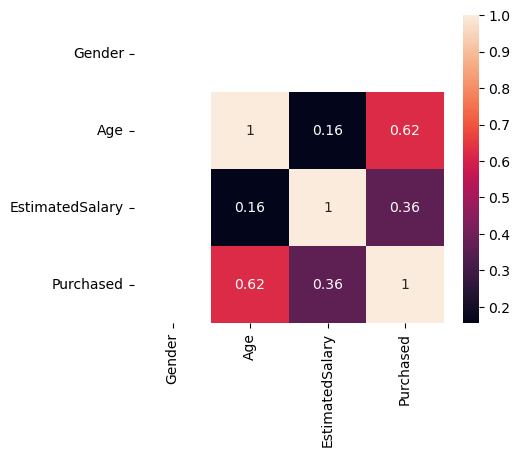

In [36]:
plt.figure(figsize=(5,4))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Plot a countplot of gender with respect to purchased

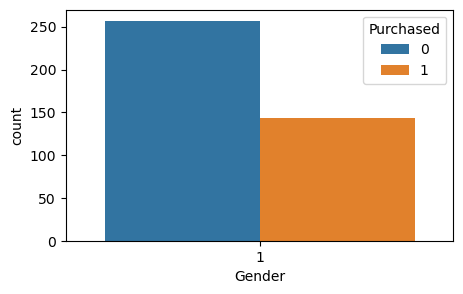

In [37]:
plt.figure(figsize=(5,3))
sns.countplot(x="Gender",hue="Purchased",data=df);
plt.show()

### Plot a displot of Age

<Figure size 200x200 with 0 Axes>

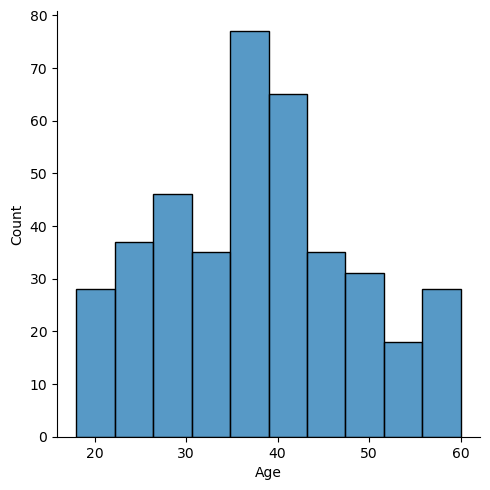

In [38]:
plt.figure(figsize=(2,2))
sns.displot(data=df,x="Age");
plt.show()

### Plot pairplot of the dataset

<Figure size 200x200 with 0 Axes>

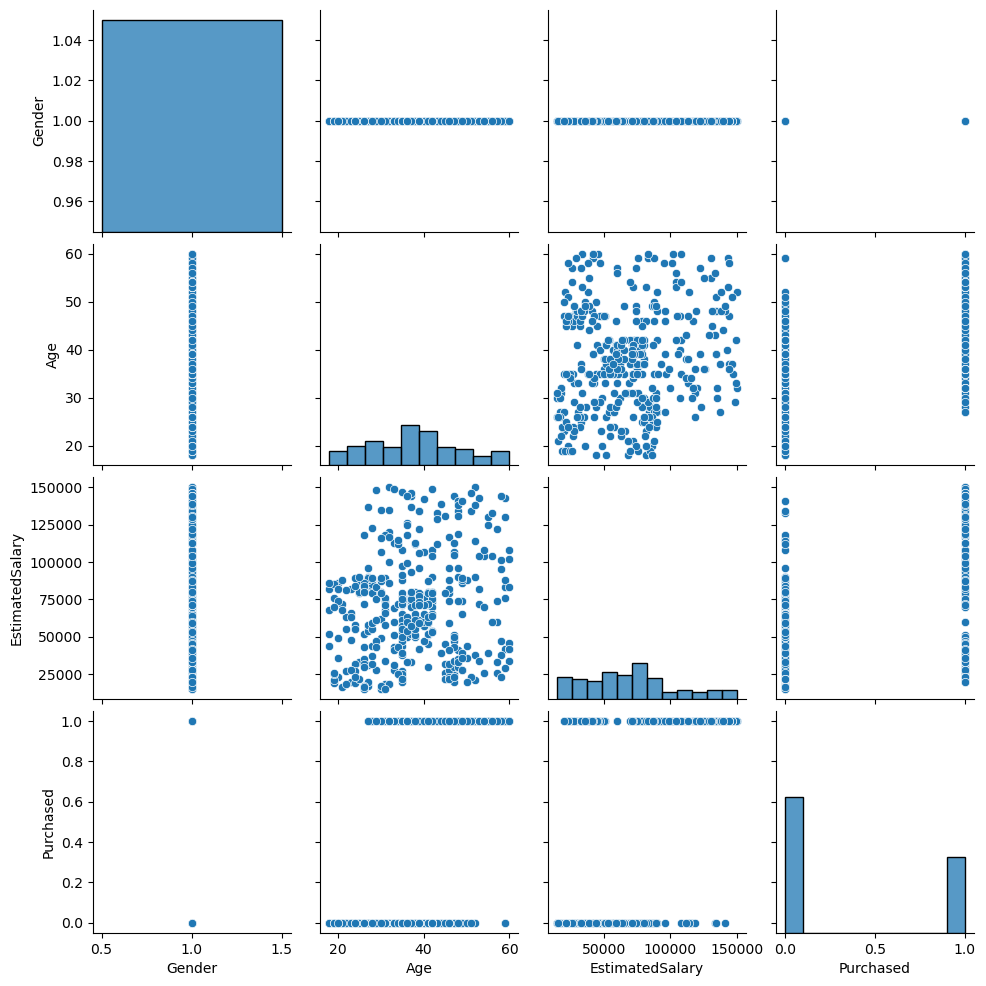

In [39]:
plt.figure(figsize=(2,2))
sns.pairplot(df)
plt.show()

## Data Preprocessing

### Split the dataset into input and target variables

In [40]:
X=df.drop(columns=["Purchased"])
y=df["Purchased"]

### Scale the data using StandardScaler

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scalar=StandardScaler()

In [46]:
scalar.fit_transform(X)

array([[ 0.        , -1.78179743, -1.49004624],
       [ 0.        , -0.25358736, -1.46068138],
       [ 0.        , -1.11320552, -0.78528968],
       ...,
       [ 0.        ,  1.17910958, -1.46068138],
       [ 0.        , -0.15807423, -1.07893824],
       [ 0.        ,  1.08359645, -0.99084367]])

In [47]:
X=pd.DataFrame(scalar.fit_transform(X),columns=X.columns)

In [50]:
X.head()

,Gender,Age,EstimatedSalary
0,0.0,-1.781797,-1.490046
1,0.0,-0.253587,-1.460681
2,0.0,-1.113206,-0.785290
3,0.0,-1.017692,-0.374182
4,0.0,-1.781797,0.183751


### Split the dataset into training and testing set

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_test,X_train,y_test,y_train= train_test_split(X,y,test_size=0.75)

### Check shape of X_train and X_test

In [53]:
X_train.shape

(300, 3)

In [54]:
X_test.shape

(100, 3)

## ML Models

### Logistic Regression Classifier

In [55]:
from sklearn.linear_model import LogisticRegression
from  sklearn import metrics
from sklearn.model_selection import cross_val_score

In [56]:
model=LogisticRegression()

In [57]:
model.fit(X_train,y_train)

LogisticRegression()

In [58]:
model.score(X_train,y_train)

0.8466666666666667

In [59]:
y_pred=model.predict(X_test)

In [61]:
metrics.accuracy_score(y_pred,y_test)

0.84

In [62]:
print("Accuracy score of our prediction is :",metrics.accuracy_score(y_pred,y_test))

Accuracy score of our prediction is : 0.84


In [63]:
metrics.confusion_matrix(y_pred,y_test)

array([[61, 12],
       [ 4, 23]], dtype=int64)

In [64]:
print("confusion matrix is :","\n",metrics.confusion_matrix(y_pred,y_test))
print("Classification Report is :","\n",metrics.classification_report(y_pred,y_test))

confusion matrix is : 
 [[61 12]
 [ 4 23]]
Classification Report is : 
               precision    recall  f1-score   support

           0       0.94      0.84      0.88        73
           1       0.66      0.85      0.74        27

    accuracy                           0.84       100
   macro avg       0.80      0.84      0.81       100
weighted avg       0.86      0.84      0.85       100



In [65]:
print("Means of cross validation score is :",cross_val_score(model,X,y,scoring="accuracy").mean())

Means of cross validation score is : 0.8275


### Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
model1=RandomForestClassifier(n_estimators=20)

In [69]:
model1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [70]:
print("Score of our trained model :",model1.score(X_train,y_train))

Score of our trained model : 0.99


In [71]:
y_pred=model1.predict(X_test)
print("Accuracy score of our prediction is :",metrics.accuracy_score(y_test, y_pred))

Accuracy score of our prediction is : 0.92


In [72]:
print("Confusion metricx is :","\n",metrics.confusion_matrix(y_test, y_pred))

Confusion metricx is : 
 [[62  3]
 [ 5 30]]


In [73]:
print("Classification Report is :","\n",metrics.classification_report(y_pred,y_test))

Classification Report is : 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        67
           1       0.86      0.91      0.88        33

    accuracy                           0.92       100
   macro avg       0.91      0.92      0.91       100
weighted avg       0.92      0.92      0.92       100



In [74]:
print("Means of cross validation score is :",cross_val_score(model1,X,y,scoring="accuracy").mean())

Means of cross validation score is : 0.85


### Support Vector Machine

In [76]:
from sklearn.svm import SVC

In [77]:
svmmodel=SVC()
svmmodel.fit(X_train,y_train)


SVC()

In [79]:
print("Score of our trained model is",svmmodel.score(X_train,y_train))

Score of our trained model is 0.8933333333333333


In [81]:
print("Accuarcy score of our prediction is",metrics.accuracy_score(y_train,y_train))

Accuarcy score of our prediction is 1.0


In [83]:
print("Confusion matrix is",metrics.confusion_matrix(y_pred,y_test))

Confusion matrix is [[62  5]
 [ 3 30]]


In [84]:
print("Classification Report is :","\n",metrics.classification_report(y_pred,y_test))

Classification Report is : 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        67
           1       0.86      0.91      0.88        33

    accuracy                           0.92       100
   macro avg       0.91      0.92      0.91       100
weighted avg       0.92      0.92      0.92       100



In [85]:
svm_score = cross_val_score(SVC(),X,y,scoring="accuracy").mean()
print("Means of cross validation score is :",cross_val_score(SVC(),X,y,scoring="accuracy").mean())

Means of cross validation score is : 0.9025000000000001


### Assign cross val scores of all models into a dataframe

In [86]:
list1={"Model":["support vector Machine","Random Forest","Logistic Regression"],"Scores":[".9","0.8550000000000001","0.82"]}

In [88]:
pd.DataFrame(list1,index=[0,1,2])

,Model,Scores
0,support vector Machine,.9
1,Random Forest,0.8550000000000001
2,Logistic Regression,0.82


***

## Deploy the model with highest score using Tkinter

In [89]:
X.head(3)

,Gender,Age,EstimatedSalary
0,0.0,-1.781797,-1.490046
1,0.0,-0.253587,-1.460681
2,0.0,-1.113206,-0.785290


In [90]:
### In this case its SVM Classifier
from tkinter import *

In [98]:
window=Tk()
window.title("Customer Behaviour Classification")
window.geometry("500x600")


window.mainloop()

#### Import all modules from Tkinter

In [99]:
from tkinter import *

### Define a function that will output to an entry box in Tkinter

In [100]:
def getPrediction():
    # .get() function is used to fetch the value from the entrybox and radiobuttons
    age1 = int(age.get())
    salary1 = int(salary.get())
    
    resultbox.delete(0, END)
    
    if gender.get() == 1:
        male = 1
        female = 0
    else:
        male = 0
        female = 1
    
    result = model.predict(scaler.transform([[age1, salary1,female,male]]))
    
    if result[0] == 1:
        resultbox.insert(0, 'Purchased')
    elif result[0] == 0:
        resultbox.insert(0, 'Not Purchased')
    else:
        resultbox.insert(0, 'Error')

### Create Tkinter window with all necessary entryboxes and labels

In [ ]:
window = Tk()
window.geometry("350x300")
window.title('Social Network Ads Prediction')
label = Label(window , text = 'Enter the Details here:', font=('calibre',10, 'bold')).pack()
agelabel = Label(window, text = 'Age')
age = Entry(window)
salarylabel = Label(window, text = 'Estimated Salary')
salary = Entry(window)
gender = StringVar()
gender.set(1)
genderlabel = Label(window, text = 'Gender')
agelabel.pack()
age.pack()
salarylabel.pack()
salary.pack()
genderlabel.pack()
Radiobutton(window, text = 'male', variable = gender , value = 1).pack()
Radiobutton(window, text = 'female', variable = gender , value = 2).pack()
button = Button(window, text = 'Get Prediction', command = getPrediction).pack()
resultbox = Entry(window)
resultbox.pack()
window.mainloop()

In [ ]:
import tkinter as tk

# create the main window
root = tk.Tk()
root.title("My Window")

# create the labels
label1 = tk.Label(root, text="Name:")
label1.grid(row=0, column=0)
label2 = tk.Label(root, text="Age:")
label2.grid(row=1, column=0)
label3 = tk.Label(root, text="Email:")
label3.grid(row=2, column=0)
label4 = tk.Label(root, text="Estimated Salary:")
label4.grid(row=3, column=0)
label5 = tk.Label(root, text="Gender:")
label5.grid(row=4, column=0)
# create the entry boxes
entry1 = tk.Entry(root)
entry1.grid(row=0, column=1)
entry2 = tk.Entry(root)
entry2.grid(row=1, column=1)
entry3 = tk.Entry(root)
entry3.grid(row=2, column=1)
entry4 = tk.Entry(root)
entry4.grid(row=2, column=1)
entry5 = tk.Entry(root)
entry5.grid(row=2, column=1)

# run the window
root.mainloop()